# Bundling Recommendations Product

## Overview


Customers are indeed vital for the survival and success of any business. By understanding their preferences and satisfying their needs, businesses can generate revenue and ensure profitability. One effective strategy to enhance customer satisfaction and drive sales is by providing personalized product bundling recommendations.

To achieve this, we can leverage retail transactional data to analyze customer purchase patterns and identify items that are frequently bought together. By employing the Apriori Algorithm, a widely used technique in association rule mining, we can build a robust model that reveals the relationships between different products.

By applying this model to an online retail transactional dataset, we can gain insights into the following questions:

Which items are commonly purchased together?
By identifying item associations, we can determine which products tend to be bought in conjunction. This information enables businesses to create attractive product bundles, offering customers a convenient and cost-effective solution by combining complementary items.

Which items are frequently purchased together in specific countries?
Different countries often have unique consumer preferences and cultural characteristics. By analyzing retail transactional data on a country-specific basis, we can discover item associations that are specific to particular regions. This allows businesses to tailor their product bundling recommendations according to local preferences, further enhancing customer satisfaction and driving sales.


### Dataset

* **PojokITCom_Product_Data.xlsx** - The file contains all transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. In thecdataset, there are eight columns:

    * InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
    * StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    * Description: Product (item) name. Nominal.
    * Quantity: The quantities of each product (item) per transaction. Numeric.
    * InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
    * UnitPrice: Unit price. Numeric, Product price per unit in sterling.
    * CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    * Country: Country name. Nominal, the name of the country where each customer resides.
    
The dataset is avilable in [Tokopedia](https://www.tokopedia.com/pojokitcom) website. 

The project is organized as follows. Section 1 explores and visualize the data. Section 2 includes data preperation and Section 3 implements the solution. Finally, Section 4 presents the summary.

## 1. Data Understanding

This step explores the dataset using different functions such as `head()`, `shape`, `describe()` and checks the null values using `isnull()`.

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import re

pd.options.display.max_rows = None

In [2]:
# Read data in the excel file

df = pd.read_excel('datasets/itcomsby.xlsx')
df.head()

,name,price,rating,sold,Quantity,category,stock_code,invoice,Description,country
0,VGA Gigabyte AORUS GeForce RTX 4060 Ti ELITE 8G,Rp 8.999.900,NaN,NaN,54,Graphics Card,58645,7619,VGA Gigabyte AORUS GeForce RTX 4060 Ti ELITE 8G,indonesia
1,Promo bundle KRAGLIN SET ASRock A620M-HDV/M.2+...,Rp 5.489.000,NaN,NaN,56,Motherboard and CPU Bundle,62791a,8863,Promo bundle KRAGLIN SET ASRock A620M-HDV/M.2+...,indonesia
2,Promo Bundle LYLLA SET ASRock A620M-HDV/M.2 + ...,Rp 6.699.000,NaN,NaN,18,Motherboard and CPU Bundle,23044,6678,Promo Bundle LYLLA SET ASRock A620M-HDV/M.2 + ...,indonesia
3,Promo Bundle WARLOCK SET ASRock A620M-HDV/M.2+...,Rp 6.999.000,NaN,NaN,29,Motherboard and CPU Bundle,68386U,2474,Promo Bundle WARLOCK SET ASRock A620M-HDV/M.2+...,indonesia
4,Promo Bundle ROCKET SET ASRock A620M-HDV/M.2 +...,Rp 8.299.000,NaN,NaN,12,Motherboard and CPU Bundle,20483,8678,Promo Bundle ROCKET SET ASRock A620M-HDV/M.2 +...,indonesia


In [3]:
df.shape

(80, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         80 non-null     object 
 1   price        80 non-null     object 
 2   rating       12 non-null     float64
 3   sold         21 non-null     float64
 4   Quantity     80 non-null     int64  
 5   category     80 non-null     object 
 6   stock_code   80 non-null     object 
 7   invoice      80 non-null     int64  
 8   Description  80 non-null     object 
 9   country      80 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.4+ KB


In [5]:
df.describe()

,rating,sold,Quantity,invoice
count,12.0,21.000000,80.000000,80.000000
mean,5.0,2.333333,48.075000,5453.087500
std,0.0,2.496664,27.539511,2624.239107
min,5.0,1.000000,3.000000,1209.000000
25%,5.0,1.000000,26.500000,3008.000000
50%,5.0,1.000000,47.000000,5684.000000
75%,5.0,3.000000,70.250000,7663.500000
max,5.0,11.000000,100.000000,9941.000000


In [6]:
# Check null values
df.isnull().sum()

name            0
price           0
rating         68
sold           59
Quantity        0
category        0
stock_code      0
invoice         0
Description     0
country         0
dtype: int64

In [7]:
# Check number of unique values
df.nunique()

name           80
price          76
rating          1
sold            6
Quantity       55
category       15
stock_code     80
invoice        80
Description    80
country         1
dtype: int64

In [8]:
# Check each stock code has only one description
df.groupby('stock_code').apply(lambda x: x['Description'].unique())

stock_code
11568           [SSD VenomRX VRX SUPER 128GB 2,5" SATA III]
12586     [Motherboard Power max H81 LGA 1150 USB 3.0 Sl...
13334               [MSI PRO B650M-A WIFI Ryzen 7000 Combo]
15469     [PSU MSI MPG A1000G PCIe 5 | PSU 1000W 80+ Gol...
19507                  [SSD QPower 512GB SATA III 500MS/s ]
20483     [Promo Bundle ROCKET SET ASRock A620M-HDV/M.2 ...
20516           [VGA Msi GeForce RTX 4090 VENTUS 3X 24G OC]
20517      [VGA Msi GeForce RTX 3060 Ti VENTUS 2X 8GD6X OC]
22329     [Casing VenomRX GENJIRO Tempered Glass ATX Gam...
23044     [Promo Bundle LYLLA SET ASRock A620M-HDV/M.2 +...
24765              [ASROCK B650 Pro RS Ryzen 7 7700X Combo]
26068     [Promo Bundle COSMO SET ASRock A620M-HDV/M.2 +...
26795     [VGA Coloful iGame GeForce RTX 4090 Neptune OC...
35211     [FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12C...
35646     [Motherboard MSI MEG Z790 ACE ,E-ATX DDR5 | In...
46626       [Casing VenomRX Vecna ATX 3Fan RGB Gaming Case]
47534     [CORSAIR Vengeance 

In [9]:
# Number of invoices for each country
df.groupby(['country']).count() ['invoice']

country
indonesia    80
Name: invoice, dtype: int64

**Observations:**

From the data, we can see that:
* The minimum price and quantity are negative, and this is impossible.
* There are null values in CustomerID and Description columns.
* Some Stock Codes are not a 5-digit integral number.
* Some Stock Codes has more than one item description.


## 2. Data Preparation

This step includes cleaning data and preparing it before using Apyori algorithm.

### 2.1. Missing Data

As we can see from the previous section, there are null data. So, I will remove the rows that contain null values.  

In [10]:
# Delete rows with null CustomerID
clean_df = df.dropna(subset=['rating', 'sold'])

# Check null values
clean_df.isnull().sum()

name           0
price          0
rating         0
sold           0
Quantity       0
category       0
stock_code     0
invoice        0
Description    0
country        0
dtype: int64

### 2.2. Dealing with Inconsistent Data

This section includes:
* Removing the price and quantity that are less than or equal to 0. 
* Removing inconsistent Stock code.
* Keeping only one description for each Stock codes.

In [11]:
# Removing the price and quantity that are less than or equal to 0
clean_df = clean_df[(clean_df.Quantity >= 0)]

In [12]:
clean_df.describe()

,rating,sold,Quantity,invoice
count,12.0,12.000000,12.000000,12.000000
mean,5.0,2.833333,51.416667,5403.416667
std,0.0,3.040136,27.786388,2602.779370
min,5.0,1.000000,8.000000,1687.000000
25%,5.0,1.000000,31.500000,3527.500000
50%,5.0,1.000000,51.000000,5298.000000
75%,5.0,3.250000,75.250000,7817.500000
max,5.0,11.000000,88.000000,9099.000000


In [13]:
# Check the number of invoices that starts with letter 'c', cancellation.
clean_df['invoice'] = clean_df['invoice'].astype('str')
clean_df[clean_df['invoice'].str.contains("c")].shape[0]

0

In [14]:
# Check the stock code

def has_right_scode(input):
    
    """
    Function: check the if the stock code is wirtten in a right way,
            The function check if the code contains 5-digit number or 5-digit number with a letter.
    Args:
      input(String): Stock code
    Return:
      Boolean: True or False
    """
    
    x = re.search("^\d{5}$", input)
    y = re.search("^\d{5}[a-zA-Z]{1}$", input)
    if (x or y):
        return True
    else:
        return False

    
clean_df['stock_code'] = clean_df['stock_code'].astype('str')
clean_df = clean_df[clean_df['stock_code'].apply(has_right_scode) == True]
clean_df.head()

<>:14: DeprecationWarning: invalid escape sequence '\d'
<>:15: DeprecationWarning: invalid escape sequence '\d'
<>:14: DeprecationWarning: invalid escape sequence '\d'
<>:15: DeprecationWarning: invalid escape sequence '\d'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6208\2289143970.py:14: DeprecationWarning: invalid escape sequence '\d'
  x = re.search("^\d{5}$", input)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6208\2289143970.py:15: DeprecationWarning: invalid escape sequence '\d'
  y = re.search("^\d{5}[a-zA-Z]{1}$", input)


,name,price,rating,sold,Quantity,category,stock_code,invoice,Description,country
17,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...,Rp 4.950.000,5.0,1.0,88,Graphics Card,98949,5632,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...,indonesia
20,Casing VenomRX GENJIRO Tempered Glass ATX Gami...,Rp 515.000,5.0,3.0,32,Casing,22329,6490,Casing VenomRX GENJIRO Tempered Glass ATX Gami...,indonesia
26,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,Rp 490.000,5.0,1.0,56,Casing,46626,1720,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,indonesia
36,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...,Rp 1.799.999,5.0,6.0,83,Motherboard,71032r,4964,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...,indonesia
37,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...,Rp 18.785.000,5.0,1.0,82,PC Build,64075L,7698,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...,indonesia


In [15]:
# One discription for each stock code

# Put all Descriptions of each StockCode in a list 
df_itms = pd.DataFrame(clean_df.groupby('stock_code').apply(lambda x: x['Description'].unique())).reset_index()
df_itms.rename(columns = { 0: 'Description2'}, inplace = True)

# StockCode that have more than one Description
df_itms[df_itms['Description2'].str.len() != 1]

,stock_code,Description2


As we can see, the items in the each Description list are the same item but they are written in different ways. So, I will keep only one describtion.

In [16]:
# Take one Description for each StockCode
df_itms.loc[:, 'Description2'] = df_itms.Description2.map(lambda x: x[0])

# StockCode that have more than one Description
df_itms[df_itms['Description2'].str.len() != 1]

,stock_code,Description2
0,22329,Casing VenomRX GENJIRO Tempered Glass ATX Gami...
1,23920L,FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12CM...
2,28211e,MSI MAG B650M MORTAR WIFI Ryzen 7000 Combo
3,46626,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case
4,64075L,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...
5,71032r,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...
6,75239v,Power Supply FSP Hydro G PRO ATX PCIe 5.0 1000...
7,76461,Casing GIGABYTE AORUS AC300 ATX Gaming Case
8,79479p,AIGO DarkFlash DLM21 MESH Black - Tempered Gla...
9,87856K,Monitor Lenovo L24i-30 23.8 Inch IPS FHD 75hz


In [17]:
# Merge clean_df with df_itms
clean_df = pd.merge(clean_df, df_itms, on = 'stock_code')
clean_df = clean_df.drop('Description', axis = 1)
clean_df.head()

,name,price,rating,sold,Quantity,category,stock_code,invoice,country,Description2
0,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...,Rp 4.950.000,5.0,1.0,88,Graphics Card,98949,5632,indonesia,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...
1,Casing VenomRX GENJIRO Tempered Glass ATX Gami...,Rp 515.000,5.0,3.0,32,Casing,22329,6490,indonesia,Casing VenomRX GENJIRO Tempered Glass ATX Gami...
2,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,Rp 490.000,5.0,1.0,56,Casing,46626,1720,indonesia,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case
3,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...,Rp 1.799.999,5.0,6.0,83,Motherboard,71032r,4964,indonesia,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...
4,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...,Rp 18.785.000,5.0,1.0,82,PC Build,64075L,7698,indonesia,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...


In [18]:
clean_df.rename(columns = { 'Description2': 'Description'}, inplace = True)
clean_df.head()

,name,price,rating,sold,Quantity,category,stock_code,invoice,country,Description
0,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...,Rp 4.950.000,5.0,1.0,88,Graphics Card,98949,5632,indonesia,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...
1,Casing VenomRX GENJIRO Tempered Glass ATX Gami...,Rp 515.000,5.0,3.0,32,Casing,22329,6490,indonesia,Casing VenomRX GENJIRO Tempered Glass ATX Gami...
2,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,Rp 490.000,5.0,1.0,56,Casing,46626,1720,indonesia,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case
3,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...,Rp 1.799.999,5.0,6.0,83,Motherboard,71032r,4964,indonesia,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...
4,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...,Rp 18.785.000,5.0,1.0,82,PC Build,64075L,7698,indonesia,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...


### 2.3. Creating Dummy Variables

To build the association rule model, the `Description` categorical variables should be converted to dummy variables.

#### 2.3.1 All Countries Data

In [19]:
df_itms_togthr = clean_df.groupby(['invoice','Description'])['Quantity'].sum()
df_itms_togthr.head()

invoice  Description                                                           
1687     FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12CM WHITE                      73
1720     Casing VenomRX Vecna ATX 3Fan RGB Gaming Case                             56
2437     AIGO DarkFlash DLM21 MESH Black - Tempered Glass Micro ATX Gaming Case    30
3891     Power Supply FSP Hydro G PRO ATX PCIe 5.0 1000W 80 Plus Gold - PSU        46
4864     Motherboard GIGABYTE Z790 AORUS ELITE AX (Intel Z790, DDR5, LGA 1700)     41
Name: Quantity, dtype: int64

In [20]:
df_itms_togthr = df_itms_togthr.unstack().fillna(0)
df_itms_togthr.head()

Description,AIGO DarkFlash DLM21 MESH Black - Tempered Glass Micro ATX Gaming Case,Casing GIGABYTE AORUS AC300 ATX Gaming Case,Casing VenomRX GENJIRO Tempered Glass ATX Gaming Case,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12CM WHITE,MSI MAG B650M MORTAR WIFI Ryzen 7000 Combo,MSI PRO B760M-P DDR4 | Motherboard Intel B760 LGA1700,Monitor Lenovo L24i-30 23.8 Inch IPS FHD 75hz,"Motherboard GIGABYTE Z790 AORUS ELITE AX (Intel Z790, DDR5, LGA 1700)",PC RAKITAN Intel Core i5 12400 | Ram 16GB | SSD 500GB,Power Supply FSP Hydro G PRO ATX PCIe 5.0 1000W 80 Plus Gold - PSU,VGA ASRock AMD Radeon RX 6650 XT Challenger D 8GB OC
invoice,,,,,,,,,,,,
1687,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1720,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2437,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0
4864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0


In [21]:
# Encode the frequency of description to 0 or 1
encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr = df_itms_togthr.applymap(encode)
df_itms_togthr.head()

Description,AIGO DarkFlash DLM21 MESH Black - Tempered Glass Micro ATX Gaming Case,Casing GIGABYTE AORUS AC300 ATX Gaming Case,Casing VenomRX GENJIRO Tempered Glass ATX Gaming Case,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12CM WHITE,MSI MAG B650M MORTAR WIFI Ryzen 7000 Combo,MSI PRO B760M-P DDR4 | Motherboard Intel B760 LGA1700,Monitor Lenovo L24i-30 23.8 Inch IPS FHD 75hz,"Motherboard GIGABYTE Z790 AORUS ELITE AX (Intel Z790, DDR5, LGA 1700)",PC RAKITAN Intel Core i5 12400 | Ram 16GB | SSD 500GB,Power Supply FSP Hydro G PRO ATX PCIe 5.0 1000W 80 Plus Gold - PSU,VGA ASRock AMD Radeon RX 6650 XT Challenger D 8GB OC
invoice,,,,,,,,,,,,
1687,0,0,0,0,1,0,0,0,0,0,0,0
1720,0,0,0,1,0,0,0,0,0,0,0,0
2437,1,0,0,0,0,0,0,0,0,0,0,0
3891,0,0,0,0,0,0,0,0,0,0,1,0
4864,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
df_itms_togthr.shape

(12, 12)

#### 2.3.2 Netherlands, Spain, France Countries Data

In [23]:
nl_df = clean_df[clean_df['country'] == 'indonesia']
'''spain_df = clean_df[clean_df['Country'] == 'Spain']
france_df = clean_df[clean_df['Country'] == 'France']'''

"spain_df = clean_df[clean_df['Country'] == 'Spain']\nfrance_df = clean_df[clean_df['Country'] == 'France']"

In [24]:
nl_df.head()

,name,price,rating,sold,Quantity,category,stock_code,invoice,country,Description
0,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...,Rp 4.950.000,5.0,1.0,88,Graphics Card,98949,5632,indonesia,VGA ASRock AMD Radeon RX 6650 XT Challenger D ...
1,Casing VenomRX GENJIRO Tempered Glass ATX Gami...,Rp 515.000,5.0,3.0,32,Casing,22329,6490,indonesia,Casing VenomRX GENJIRO Tempered Glass ATX Gami...
2,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,Rp 490.000,5.0,1.0,56,Casing,46626,1720,indonesia,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case
3,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...,Rp 1.799.999,5.0,6.0,83,Motherboard,71032r,4964,indonesia,MSI PRO B760M-P DDR4 | Motherboard Intel B760 ...
4,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...,Rp 18.785.000,5.0,1.0,82,PC Build,64075L,7698,indonesia,PC RAKITAN Intel Core i5 12400 | Ram 16GB | SS...


In [25]:
'''spain_df.head()'''

'spain_df.head()'

In [26]:
'''france_df.head()'''

'france_df.head()'

In [27]:
df_itms_togthr_nl = nl_df.groupby(['invoice','Description'])['Quantity'].sum()

df_itms_togthr_nl = df_itms_togthr_nl.unstack().fillna(0)

encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr_nl = df_itms_togthr_nl.applymap(encode)
df_itms_togthr_nl.head()

Description,AIGO DarkFlash DLM21 MESH Black - Tempered Glass Micro ATX Gaming Case,Casing GIGABYTE AORUS AC300 ATX Gaming Case,Casing VenomRX GENJIRO Tempered Glass ATX Gaming Case,Casing VenomRX Vecna ATX 3Fan RGB Gaming Case,FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12CM WHITE,MSI MAG B650M MORTAR WIFI Ryzen 7000 Combo,MSI PRO B760M-P DDR4 | Motherboard Intel B760 LGA1700,Monitor Lenovo L24i-30 23.8 Inch IPS FHD 75hz,"Motherboard GIGABYTE Z790 AORUS ELITE AX (Intel Z790, DDR5, LGA 1700)",PC RAKITAN Intel Core i5 12400 | Ram 16GB | SSD 500GB,Power Supply FSP Hydro G PRO ATX PCIe 5.0 1000W 80 Plus Gold - PSU,VGA ASRock AMD Radeon RX 6650 XT Challenger D 8GB OC
invoice,,,,,,,,,,,,
1687,0,0,0,0,1,0,0,0,0,0,0,0
1720,0,0,0,1,0,0,0,0,0,0,0,0
2437,1,0,0,0,0,0,0,0,0,0,0,0
3891,0,0,0,0,0,0,0,0,0,0,1,0
4864,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
"""df_itms_togthr_spain = spain_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()

df_itms_togthr_spain = df_itms_togthr_spain.unstack().fillna(0)

encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr_spain = df_itms_togthr_spain.applymap(encode)
df_itms_togthr_spain.head()"""

"df_itms_togthr_spain = spain_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()\n\ndf_itms_togthr_spain = df_itms_togthr_spain.unstack().fillna(0)\n\nencode = lambda x : 1 if (x >= 1) else 0\ndf_itms_togthr_spain = df_itms_togthr_spain.applymap(encode)\ndf_itms_togthr_spain.head()"

In [29]:
'''df_itms_togthr_france = france_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()

df_itms_togthr_france = df_itms_togthr_france.unstack().fillna(0)

encode = lambda x : 1 if (x >= 1) else 0
df_itms_togthr_france = df_itms_togthr_france.applymap(encode)
df_itms_togthr_france.head()'''

"df_itms_togthr_france = france_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()\n\ndf_itms_togthr_france = df_itms_togthr_france.unstack().fillna(0)\n\nencode = lambda x : 1 if (x >= 1) else 0\ndf_itms_togthr_france = df_itms_togthr_france.applymap(encode)\ndf_itms_togthr_france.head()"

Now, the data is ready to be used to build the association rule model.

## 3. System Modeling 

To build the association rule model and answer the questions related to product bundling recommendation, we will employ the Apriori Algorithm, which is a popular technique in association rule mining. The model will utilize a dataset containing retail transactional data.

The first step is to determine an appropriate minimum support value for our model. This value influences the threshold for item frequency in the dataset. For larger datasets, a smaller support value is chosen to capture more item associations, while for smaller datasets, a slightly higher support value is selected to avoid noise and ensure reliable results.

In this project, we will consider the size of the dataset to determine the minimum support value, ensuring it is suitable for product bundling recommendation. By carefully evaluating the dataset, we can strike a balance between capturing significant associations and maintaining a reasonable level of computational complexity.

Additionally, we will set the confidence level to 60%. This parameter helps determine the strength of the association between items. With a confidence level of 60%, we will focus on finding associations where there is a high likelihood (at least 60%) that one item will be purchased if the other is already in the customer's basket.

After building the association rule model with the selected support and confidence values, we can examine the results to address the questions at hand. We will identify the items that are frequently bought together, allowing us to suggest these bundles to customers. Moreover, by analyzing the dataset on a country-specific basis, we can determine which items are commonly purchased together in different countries. This knowledge can inform targeted product bundling recommendations for customers based on their geographical location.

### 3.1 All Countries Data

In [30]:
# Build the Apriori model
rep_items = apriori(df_itms_togthr, min_support = 0.02, use_colnames = True, verbose = 1)
rep_items.head()

Processing 132 combinations | Sampling itemset size 2


C:\ANACONDA\envs\pythonProject\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.083333,(AIGO DarkFlash DLM21 MESH Black - Tempered Gl...
1,0.083333,(Casing GIGABYTE AORUS AC300 ATX Gaming Case)
2,0.083333,(Casing VenomRX GENJIRO Tempered Glass ATX Gam...
3,0.083333,(Casing VenomRX Vecna ATX 3Fan RGB Gaming Case)
4,0.083333,(FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12C...


In [38]:
print(rep_items)


     support                                           itemsets
0   0.083333  (AIGO DarkFlash DLM21 MESH Black - Tempered Gl...
1   0.083333      (Casing GIGABYTE AORUS AC300 ATX Gaming Case)
2   0.083333  (Casing VenomRX GENJIRO Tempered Glass ATX Gam...
3   0.083333    (Casing VenomRX Vecna ATX 3Fan RGB Gaming Case)
4   0.083333  (FAN AIGO Darkflash INFINITY 8 ARGB 5IN1 - 12C...
5   0.083333       (MSI MAG B650M MORTAR WIFI Ryzen 7000 Combo)
6   0.083333  (MSI PRO B760M-P DDR4 | Motherboard Intel B760...
7   0.083333    (Monitor Lenovo L24i-30 23.8 Inch IPS FHD 75hz)
8   0.083333  (Motherboard GIGABYTE Z790 AORUS ELITE AX (Int...
9   0.083333  (PC RAKITAN Intel Core i5 12400 | Ram 16GB | S...
10  0.083333  (Power Supply FSP Hydro G PRO ATX PCIe 5.0 100...
11  0.083333  (VGA ASRock AMD Radeon RX 6650 XT Challenger D...


In [39]:
# Save rep_items DataFrame to CSV
rep_items.to_csv('rep_items.csv', index=False)

# Save rules DataFrame to CSV
rules.to_csv('rules.csv', index=False)


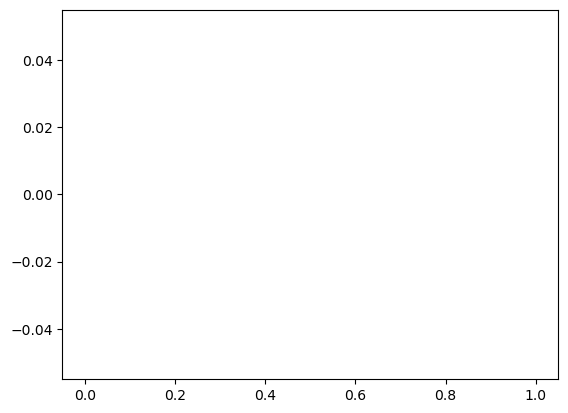

In [33]:
# Show confidence distribution
plt.hist(rules['confidence'])
plt.show()

In [34]:
# Show the rules that have confidance > 0.75
high_confidance = rules[rules['confidence'] > 0.75]
high_confidance [['antecedents', 'consequents']]

,antecedents,consequents


### 3.2 Netherlands, Spain, France Countries Data

In [35]:
# Build the Apriori model
rep_items_nl = apriori(df_itms_togthr_nl, min_support = 0.1, use_colnames = True, verbose = 1)
rep_items_nl.head()

C:\ANACONDA\envs\pythonProject\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets


In [36]:
# Generate the association rules dataframe
rules_nl = association_rules(rep_items_nl, metric = "confidence", min_threshold = 0.6)
rules_nl.head()

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [ ]:
# The number of rules
rules_nl.shape[0]

In [ ]:
high_confidance_nl = rules_nl[rules_nl['confidence'] > 0.75]
high_confidance_nl [['antecedents', 'consequents']]

In [ ]:
# Build the Apriori model
rep_items_spain = apriori(df_itms_togthr_spain, min_support = 0.1, use_colnames = True, verbose = 1)
rep_items_spain.head()

In [ ]:
# Generate the association rules dataframe
rules_spain = association_rules(rep_items_spain, metric = "confidence", min_threshold = 0.6)
rules_spain

In [ ]:
# The number of rules
rules_spain.shape[0]

In [ ]:
high_confidance_spain = rules_spain[rules_spain['confidence'] > 0.75]
high_confidance_spain [['antecedents', 'consequents']]

In [ ]:
# Build the Apriori model
rep_items_france = apriori(df_itms_togthr_france, min_support = 0.05, use_colnames = True, verbose = 1)
rep_items_france.head()

In [ ]:
# Generate the association rules dataframe
rules_france = association_rules(rep_items_france, metric = "confidence", min_threshold = 0.6)
rules_france

In [ ]:
# The number of rules
rules_france.shape[0]

In [ ]:
high_confidance_france = rules_france[rules_france['confidence'] > 0.75]
high_confidance_france [['antecedents', 'consequents']]

### 3.3 Results Discussion

The results of association analysis show which item is frequently purchased with other items. The result of association analysis using the whole dataset is differnt than the result of association analysis when using a dataset of a spacific country. 

## 4. Summary Analysis

After applying the Apriori algorithm to the retail transactional dataset, we obtained valuable rules regarding the frequent purchase associations between items. These rules provide insights into the products that are often bought together, which can be highly beneficial for product bundling recommendation strategies in e-commerce websites.

By analyzing the entire dataset, we uncovered associations between items that are relevant across different countries and customer segments. These associations reflect broader patterns of customer preferences and purchasing behavior, enabling us to generate recommendations for item bundling that have a broad appeal and potential for driving sales.

However, it's important to note that the results of association analysis may differ when analyzing datasets specific to individual countries. Cultural, geographical, and demographic factors can significantly influence customer preferences and purchasing habits. Thus, by conducting association analysis on a country-specific basis, we can identify associations that are unique to each region, providing targeted recommendations for item bundling in respective markets.

The rules derived from both the analysis of the whole dataset and the analysis of country-specific datasets are highly valuable for item recommendations on e-commerce websites. By leveraging these rules, businesses can offer customers tailored product bundles based on their preferences and purchasing behavior. This personalized approach enhances the customer experience, increases the likelihood of cross-selling, and ultimately drives revenue and customer satisfaction.

In summary, the results of the association analysis using the Apriori algorithm provide valuable insights for product bundling recommendation in e-commerce. By considering both the associations from the whole dataset and those specific to individual countries, businesses can offer personalized recommendations that cater to diverse customer segments, resulting in improved customer satisfaction and increased sales.

## 5. Future Develepoment

Based on the valuable insights gained from the association analysis using the Apriori algorithm, businesses can leverage these findings to drive future development in their product bundling recommendation strategies. Here are some potential areas for development:

1. Personalized Recommendations: The analysis of the whole dataset and country-specific datasets allows businesses to offer personalized recommendations to customers. Going forward, businesses can further refine their recommendation engines by incorporating additional customer data, such as browsing history, past purchases, and demographic information. This increased personalization will enhance the relevance and effectiveness of product bundling recommendations, leading to higher customer satisfaction and conversion rates.

2. Dynamic Bundling: The association rules derived from the analysis can be used to create static product bundles that are commonly purchased together. However, businesses can explore dynamic bundling strategies by continuously analyzing real-time transactional data. By identifying emerging trends and adjusting product bundles accordingly, businesses can stay responsive to evolving customer preferences and market dynamics. Dynamic bundling can lead to increased sales and customer engagement by offering timely and relevant product recommendations.

3. Cross-Selling Opportunities: The association rules reveal items that are frequently purchased together, presenting cross-selling opportunities. Businesses can capitalize on these associations by strategically promoting complementary products during the customer journey. For example, when a customer adds a specific item to their cart, the system can suggest related products that enhance the overall experience or offer cost savings through bundled offers. This proactive approach to cross-selling can boost average order value and customer loyalty.

4. Localization: The analysis of country-specific datasets provides insights into unique associations and preferences specific to different regions. Future development can involve tailoring product bundling recommendations to local markets by considering cultural nuances, regional preferences, and purchasing behaviors. Localization efforts can include adjusting product bundles, promotional offers, and marketing campaigns to resonate with customers in each country, resulting in more effective and targeted recommendations.

5. Continuous Analysis and Refinement: The association analysis is an iterative process that should be regularly updated to capture evolving customer preferences and market dynamics. By continuously analyzing transactional data, businesses can identify new item associations, monitor changes in purchasing patterns, and refine their product bundling strategies accordingly. This continuous improvement process ensures that businesses stay responsive to customer needs and maintain a competitive edge in the e-commerce landscape.

In conclusion, the insights gained from the association analysis provide a solid foundation for future development in product bundling recommendation strategies. By focusing on personalization, dynamic bundling, cross-selling opportunities, localization, and continuous analysis, businesses can enhance the effectiveness of their recommendations, drive sales, and deliver exceptional customer experiences in the evolving e-commerce landscape.